<a href="https://colab.research.google.com/github/gittEze/SentimentClassifier_TextEmotionDataset/blob/main/Clasificaci%C3%B3n_de_sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

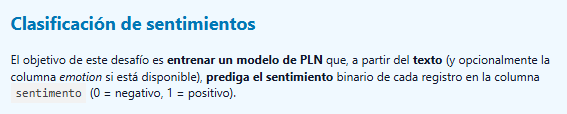

In [21]:
import pandas as pd
df = pd.read_csv('dataset_train.csv')

df.head()

,id,user,text,date,emotion,sentimento
0,126,@_blutsxchtig,"Se refiere a Phel, casi se muere él. Hoy. Y lu...","Jan 5, 2024 · 9:11 PM UTC",overwhelmed,0
1,2510,@jazminmoree,JAJAJJAA cada atrevido cae a ranchar a casa,"Jan 6, 2024 · 1:18 AM UTC",daring,1
2,2452,@MrFibrosis,Ahora fuera de joda y ya que le interesa a tod...,"Jan 6, 2024 · 1:43 AM UTC",optimistic,1
3,934,@potasini,"Que hago con esta necesidad de afecto, me sien...","Jan 6, 2024 · 3:06 AM UTC",isolated,0
4,524,@Exasperante__,Siiiiii estamos adentro jajajajaja por fin lpm,"Jan 5, 2024 · 7:46 PM UTC",irritated,0


In [22]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2072 non-null   int64 
 1   user        2072 non-null   object
 2   text        2072 non-null   object
 3   date        2072 non-null   object
 4   emotion     2072 non-null   object
 5   sentimento  2072 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 97.3+ KB


,0
id,0
user,0
text,0
date,0
emotion,0
sentimento,0


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentimento'], test_size=0.10)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizador = CountVectorizer()
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train_vec, y_train)

LogisticRegression()

In [25]:
df_test = pd.read_csv('dataset_test_sin_sentimento.csv')
df_test.isnull().sum()

,0
id,0
user,0
text,0
date,0
emotion,0


In [20]:
nueva = df_test['text']
X_nueva = vectorizador.transform(nueva)
predict = modelo.predict(X_nueva)

df_test['etiqueta'] = predict

output = pd.DataFrame({'ID': df_test['id'], 'etiqueta': predict})
output.to_csv('submission3.csv', index=False)